<a href="https://colab.research.google.com/github/falloutdey/Atividade2_LLM_e_Estatistica/blob/main/Atividade2_LLM_e_Estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A: Correlação

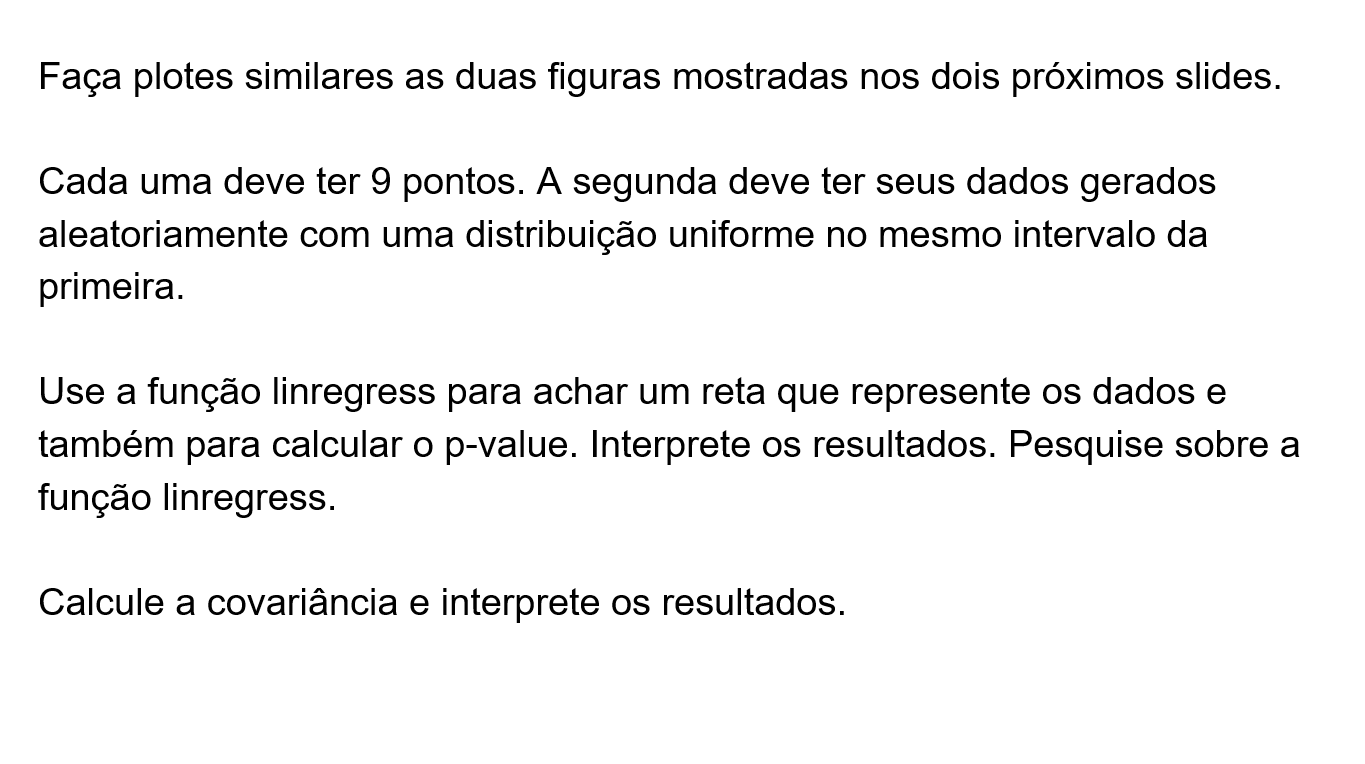
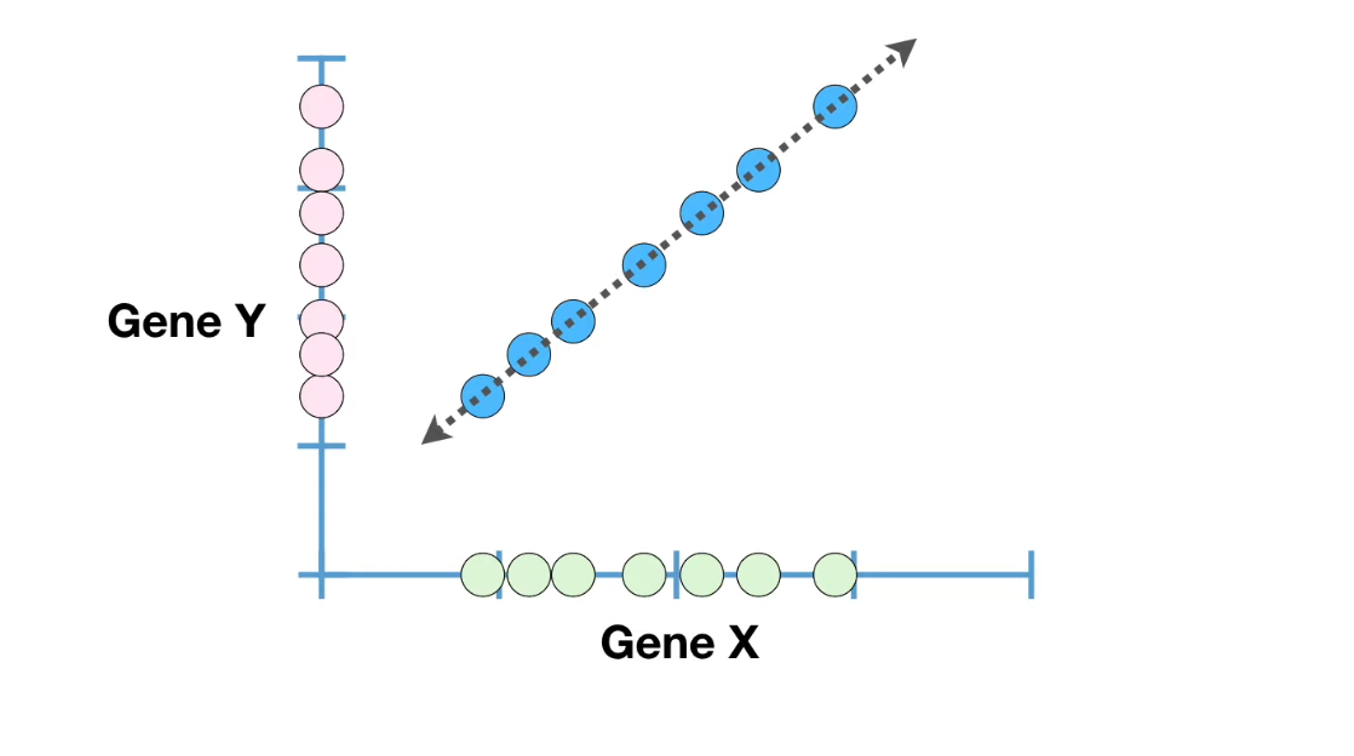
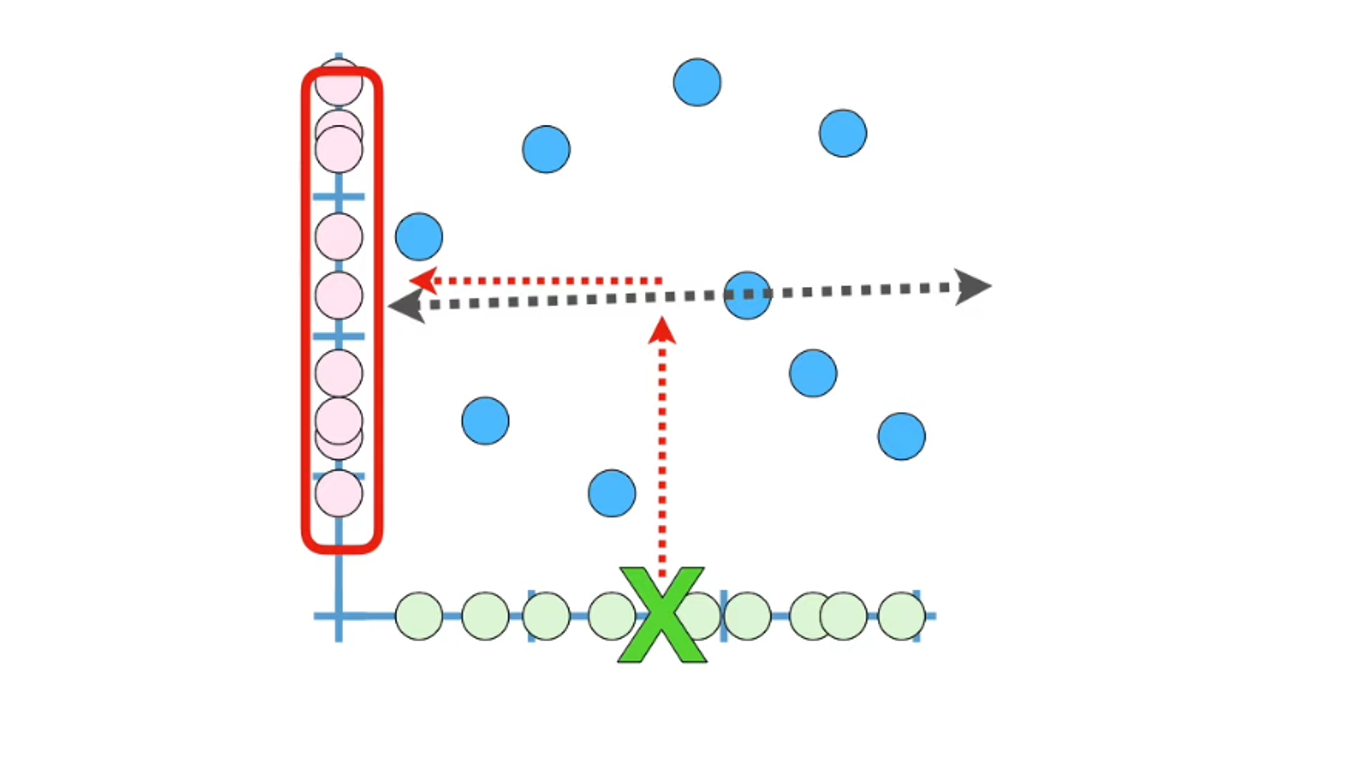


=== RESULTADOS ESTATÍSTICOS ===
        Simulação           Equação      P-value  Covariância   R-value
   Caso 1: Linear  y = 1.99x + 0.51 6.365071e-08    23.274723  0.993736
Caso 2: Aleatório y = -0.84x + 6.93 1.079783e-01    -2.229330 -0.571438


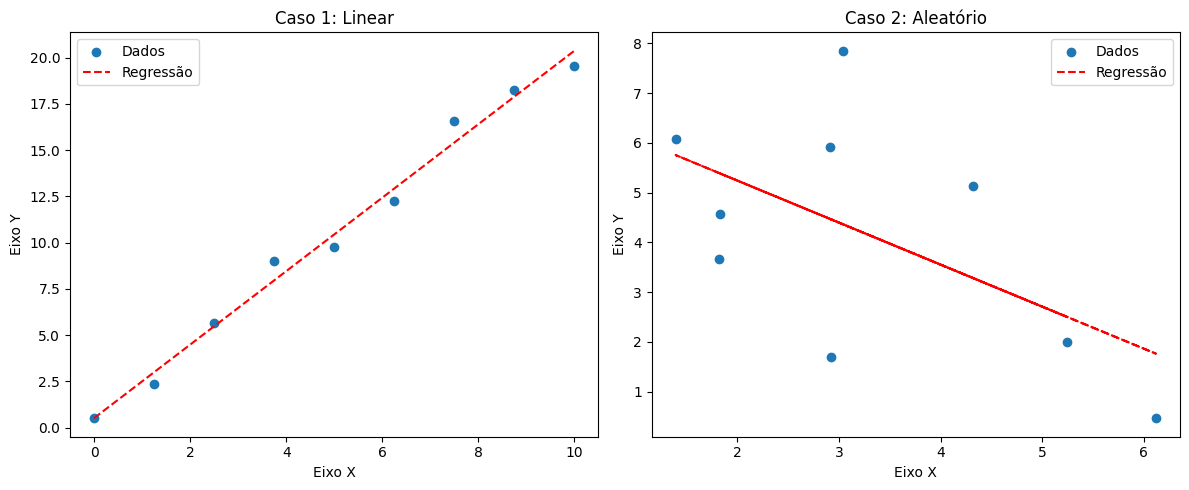

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress

np.random.seed(42)

x1 = np.linspace(0, 10, 9)
y1 = 2 * x1 + np.random.normal(0, 1, 9)
x2 = np.random.uniform(0, 10, 9)
y2 = np.random.uniform(0, 10, 9)

dados = [(x1, y1, "Caso 1: Linear"), (x2, y2, "Caso 2: Aleatório")]
resultados = []

plt.figure(figsize = (12, 5))

for i, (x, y, titulo) in enumerate(dados, 1):
  res = linregress(x, y)
  cov = np.cov(x, y)[0, 1]
  resultados.append({"Simulação": titulo, "Equação": f"y = {res.slope:.2f}x + {res.intercept:.2f}", "P-value": res.pvalue, "Covariância": cov, "R-value": res.rvalue})
  plt.subplot(1, 2, i)
  plt.scatter(x, y, label = 'Dados')
  plt.plot(x, res.intercept + res.slope * x, 'r--', label='Regressão')
  plt.title(titulo)
  plt.xlabel("Eixo X")
  plt.ylabel("Eixo Y")
  plt.legend()

print("\n=== RESULTADOS ESTATÍSTICOS ===\n" + pd.DataFrame(resultados).to_string(index=False))
plt.tight_layout()
plt.show()

### Geramos dois cenários distintos. No primeiro, criamos números que crescem juntos propositalmente, e no segundo, usamos números sorteados ao acaso, sem ligação entre si.
### No caso dos dados organizados, o resultado visual foi uma linha reta ascendente clara. A análise estatística confirmou isso através de um P-value praticamente zero. De forma simples, esse número indica que a chance daquela linha ter aparecido por sorte é nula, ou seja, existe uma conexão real e confiável entre as informações: quando uma sobe, a outra também sobe.
### Já no caso dos dados aleatórios, os pontos ficaram espalhados. O computador até conseguiu desenhar uma reta tentando encontrar um caminho, mas a estatística mostrou que ela é enganosa. O P-value deu alto (acima de 0,05), o que serve como um alerta de que qualquer padrão ali é mera coincidência.

# B: Estimando um Intervalo de Confiança para a Média
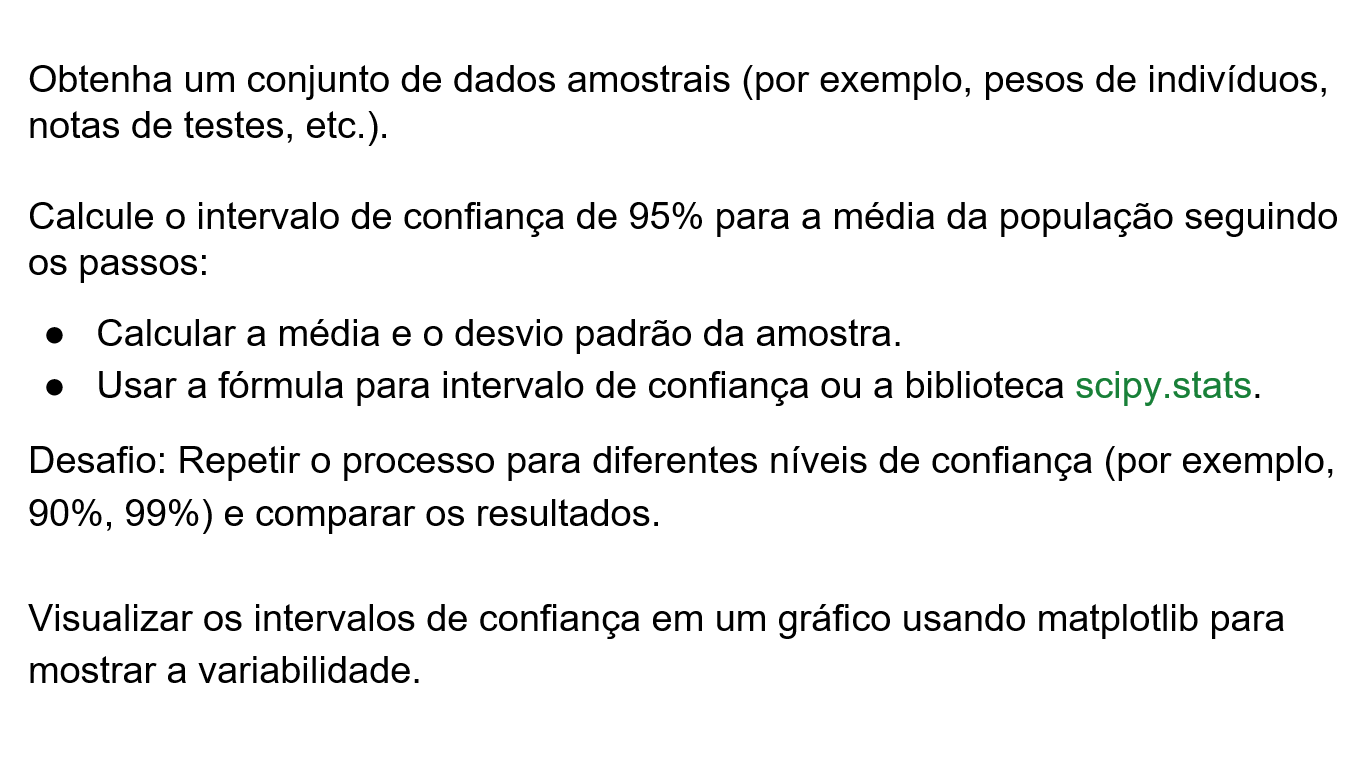


=== TABELA DE INTERVALOS DE CONFIANÇA ===
Nível Média Limite Inferior Limite Superior Margem Erro
  90% 72.75           70.53           74.96        2.21
  95% 72.75           70.09           75.40        2.65
  99% 72.75           69.21           76.28        3.54


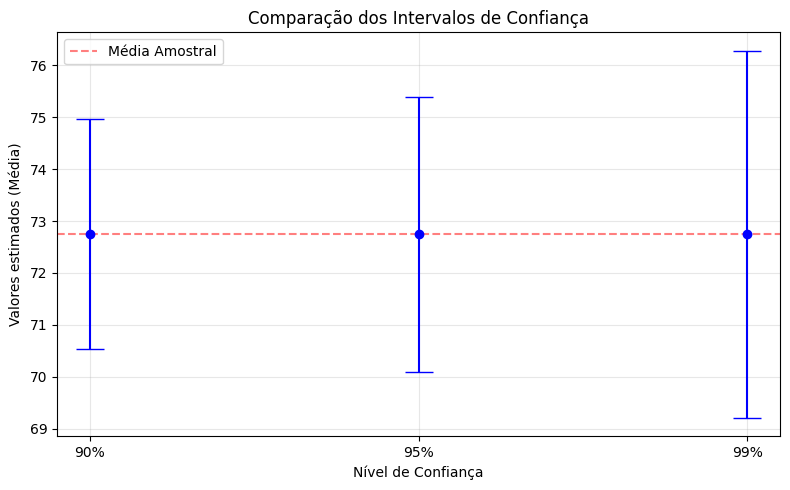

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)
dados = np.random.normal(loc=75, scale = 10, size = 50)

niveis = [0.90, 0.95, 0.99]
media = np.mean(dados)
erro_padrao = stats.sem(dados)
resultados = []
erro_visualizacao = []

for nivel in niveis:
  intervalo = stats.t.interval(nivel, len(dados)-1, loc=media, scale=erro_padrao)
  margem_erro = intervalo[1] - media
  erro_visualizacao.append(margem_erro)
  resultados.append({"Nível": f"{nivel*100:.0f}%", "Média": f"{media:.2f}", "Limite Inferior": f"{intervalo[0]:.2f}", "Limite Superior": f"{intervalo[1]:.2f}", "Margem Erro": f"{margem_erro:.2f}"})

plt.figure(figsize=(8, 5))
plt.errorbar([r["Nível"] for r in resultados], [media]*3, yerr=erro_visualizacao, fmt='o', capsize=10, color='blue')
plt.axhline(y=media, color='red', linestyle='--', alpha=0.5, label='Média Amostral')
plt.title("Comparação dos Intervalos de Confiança")
plt.xlabel("Nível de Confiança")
plt.ylabel("Valores estimados (Média)")
plt.legend()
plt.grid(True, alpha=0.3)

print("\n=== TABELA DE INTERVALOS DE CONFIANÇA ===\n" + pd.DataFrame(resultados).to_string(index=False))
plt.tight_layout()
plt.show()

###O objetivo do estudo foi tentar descobrir a nota média de todos os alunos baseando-se apenas nas notas de um pequeno grupo de 50 pessoas. Para isso, calculamos faixas de valores com diferentes níveis de certeza: 90%, 95% e 99%.

###Os resultados mostraram que existe uma troca necessária: quanto mais certeza queremos ter, menos específica é a nossa resposta. Quando exigimos uma garantia muito alta (99%) de que acertamos a média, precisamos usar uma margem de erro grande, o que deixa o resultado muito amplo. Por outro lado, se aceitarmos um risco um pouco maior (90% de certeza), conseguimos encurtar a margem de erro e ter um número mais preciso. Em resumo, para ter mais segurança, precisamos aceitar uma resposta menos exata.

# C: p-value em um Teste de Hipótese
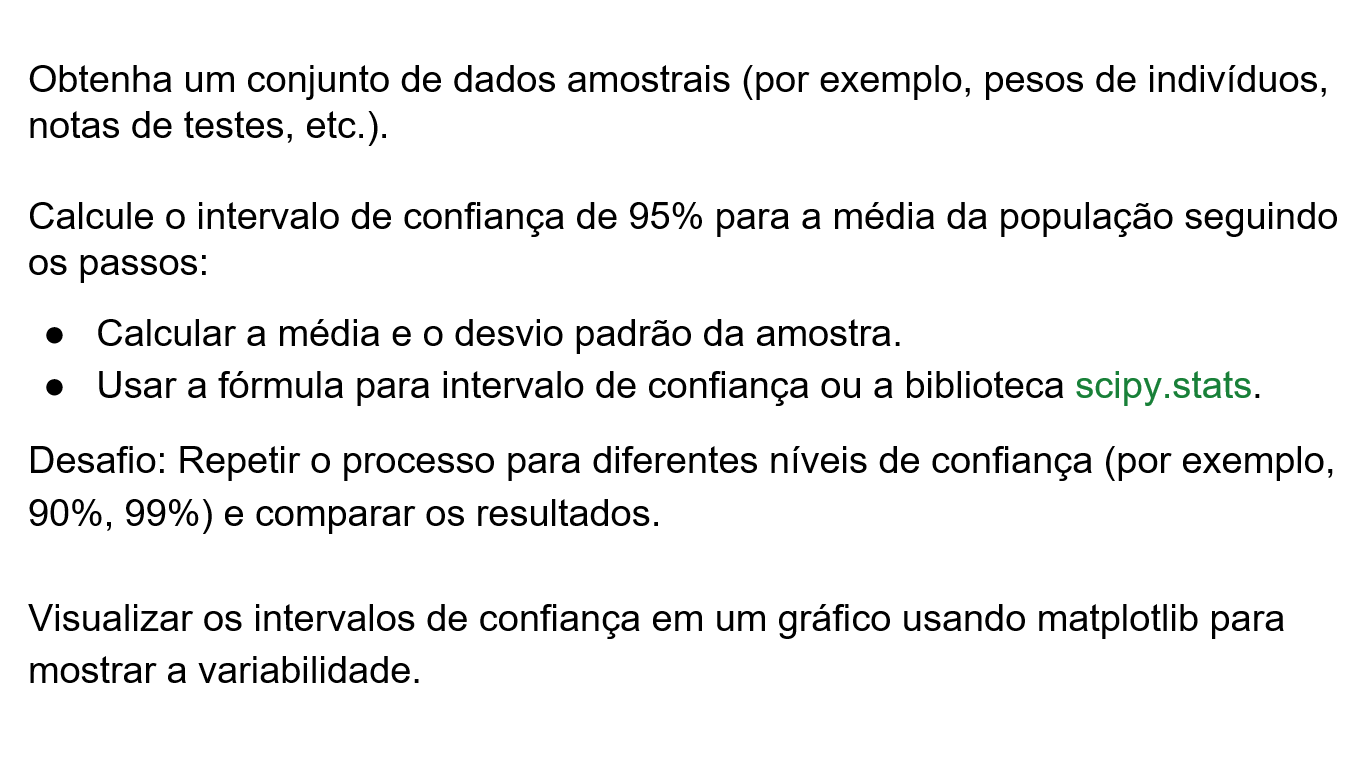

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

np.random.seed(42)
controle = np.random.normal(loc=70, scale = 10, size = 30)
teste = np.random.normal(loc=70, scale = 10, size = 30)

t_stat, p_value = ttest_ind(controle, teste)
alpha = 0.05
decisao = "Rejeitar H0" if p_value < alpha else "Falha em rejeitar H0"
conclusao = "Diferença Significativa" if p_value < alpha else "Sem diferença estatística"

dados = {"Métrica" : ["Média Controle", "Média Teste", "Estatística T", "P-Value", "Decisão (alpha=0.05)"], "Valor": [f"{np.mean(controle):.2f}", f"{np.mean(teste):.2f}", f"{t_stat:.2f}", f"{p_value:.4f}", decisao]}
print(f"HIPÓTESE NULA (H0): As médias dos grupos Controle e Teste são iguais.\n")
print("=== RESULTADOS DO TESTE T ===\n" + pd.DataFrame(dados).to_string(index=False))
print(f"\nCONCLUSÃO: Com um p-value de {p_value:.4f}, a conclusão é: {conclusao}.")

HIPÓTESE NULA (H0): As médias dos grupos Controle e Teste são iguais.

=== RESULTADOS DO TESTE T ===
             Métrica                Valor
      Média Controle                68.12
         Média Teste                68.79
       Estatística T                -0.28
             P-Value               0.7779
Decisão (alpha=0.05) Falha em rejeitar H0

CONCLUSÃO: Com um p-value de 0.7779, a conclusão é: Sem diferença estatística.


###O teste comparou o desempenho dos dois grupos (Controle e Teste) e verificou que as médias obtidas foram praticamente idênticas: 68,12 e 68,79. A diferença entre elas é inferior a um ponto.

###A análise estatística confirmou que essa variação mínima é irrelevante. O resultado do cálculo, representado pelo P-value de 0,78, indica que existe uma chance de 78% de que essa leve diferença tenha ocorrido puramente por acaso ou sorte. Como essa probabilidade é muito alta (muito acima do limite de segurança padrão de 5%), a conclusão é que não existe diferença real entre os grupos. Estatisticamente, o desempenho de ambos foi igual.

#D: significance_level
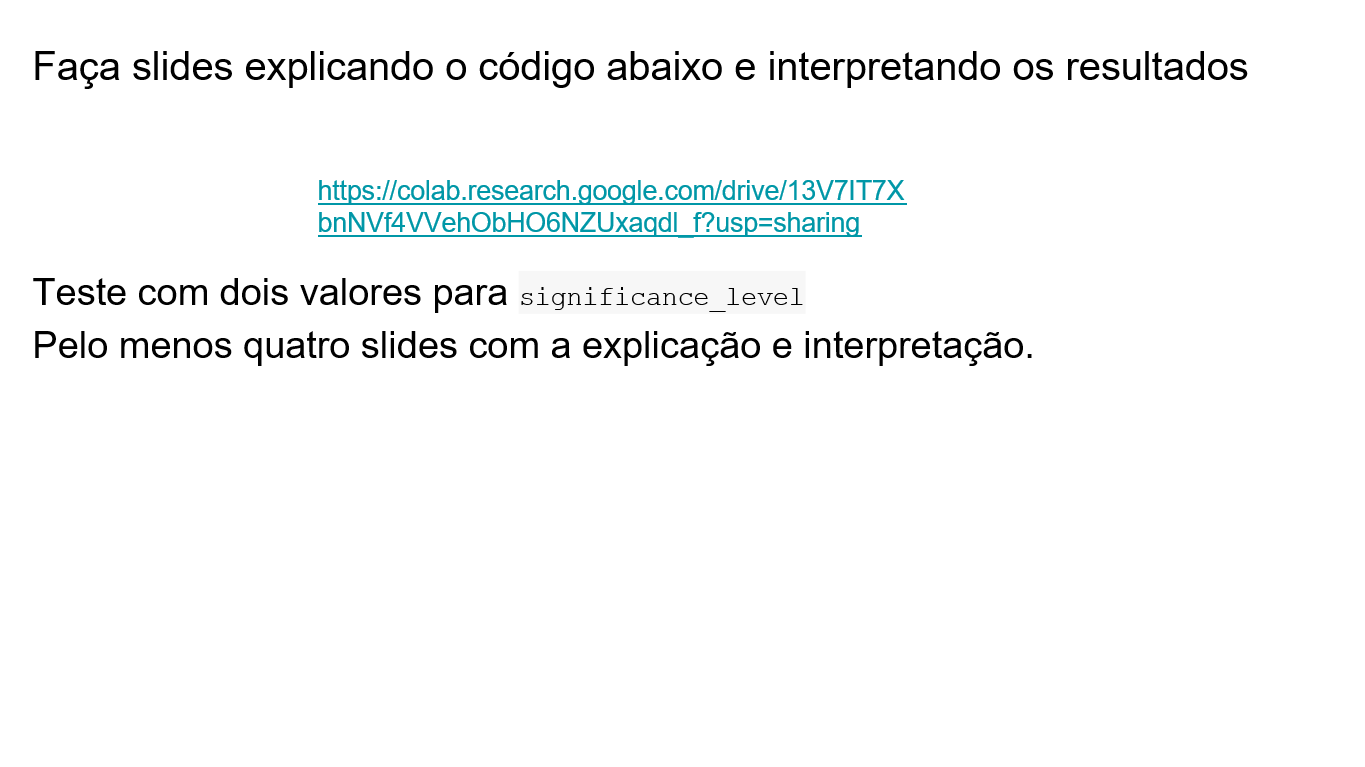

#E: Reproduzindo slides em código
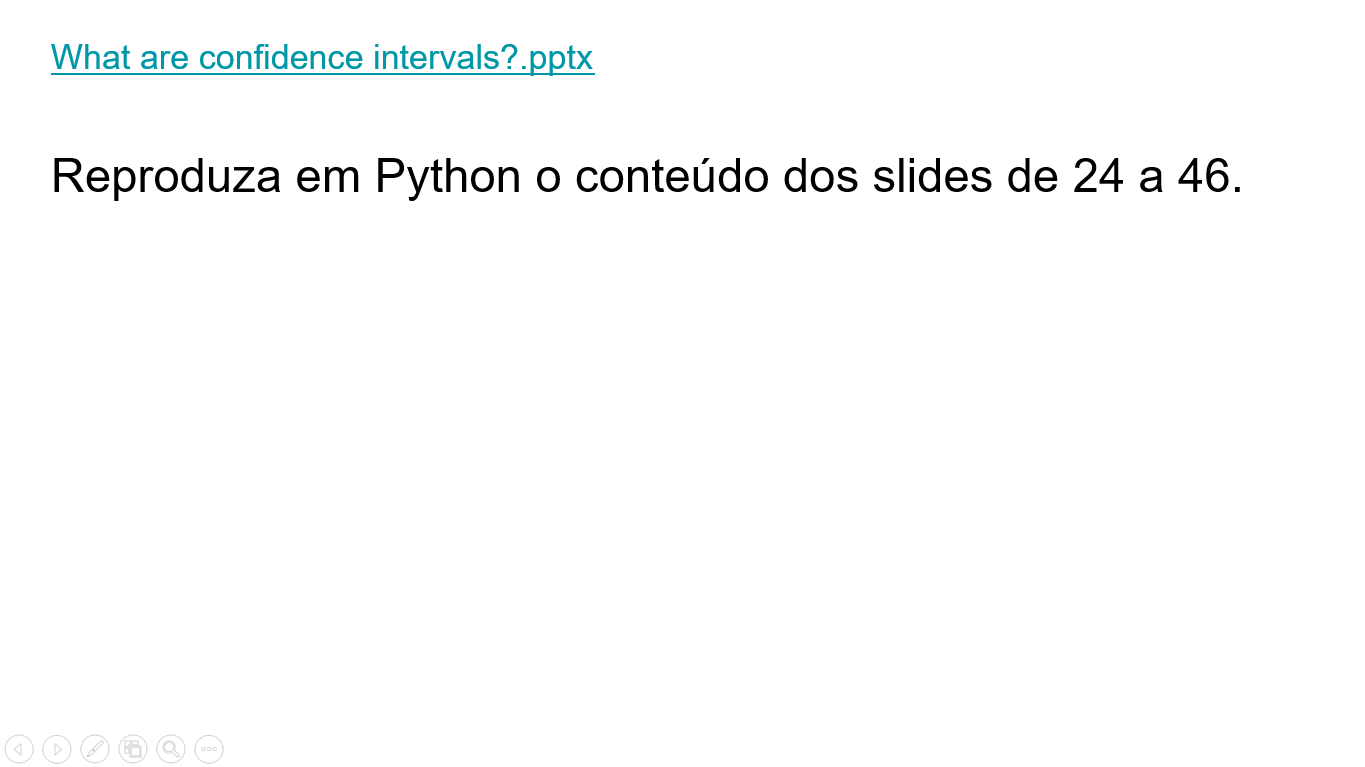

#F: Linear Regression
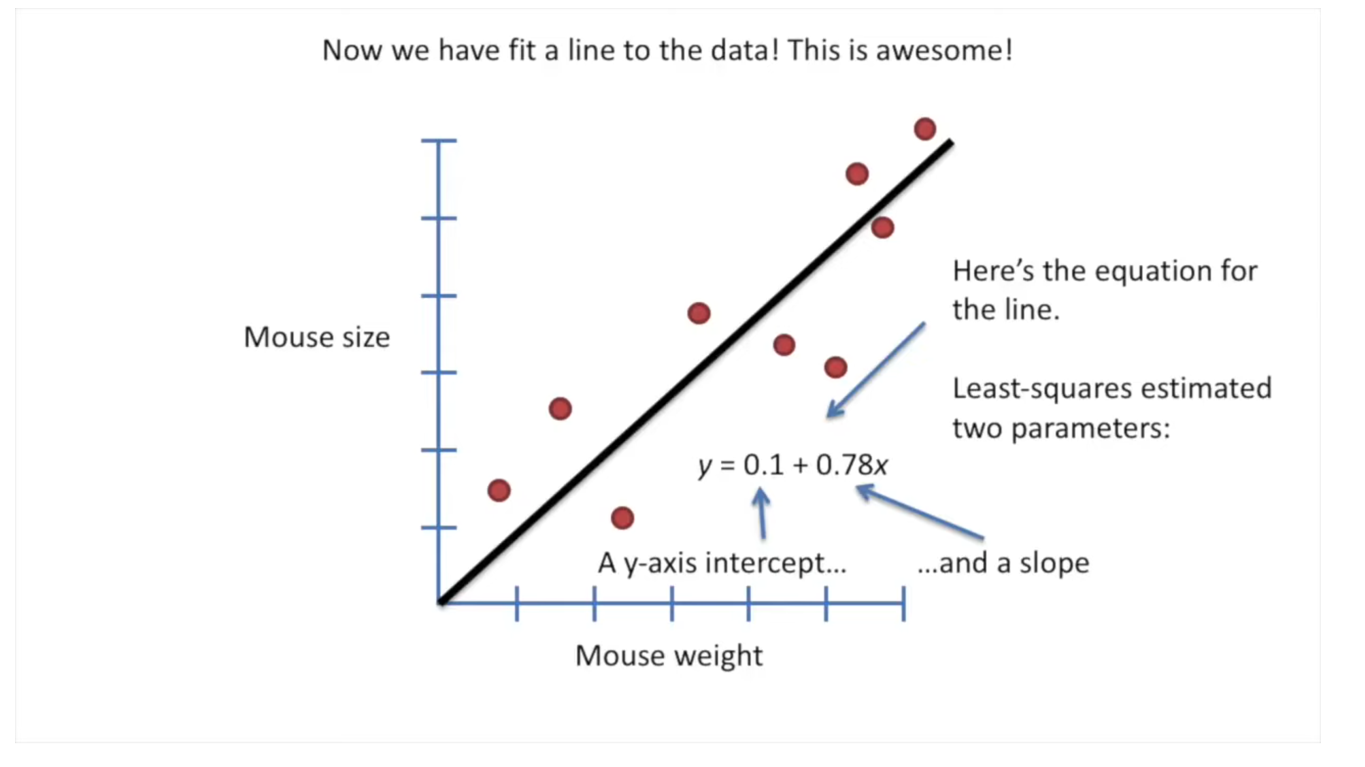
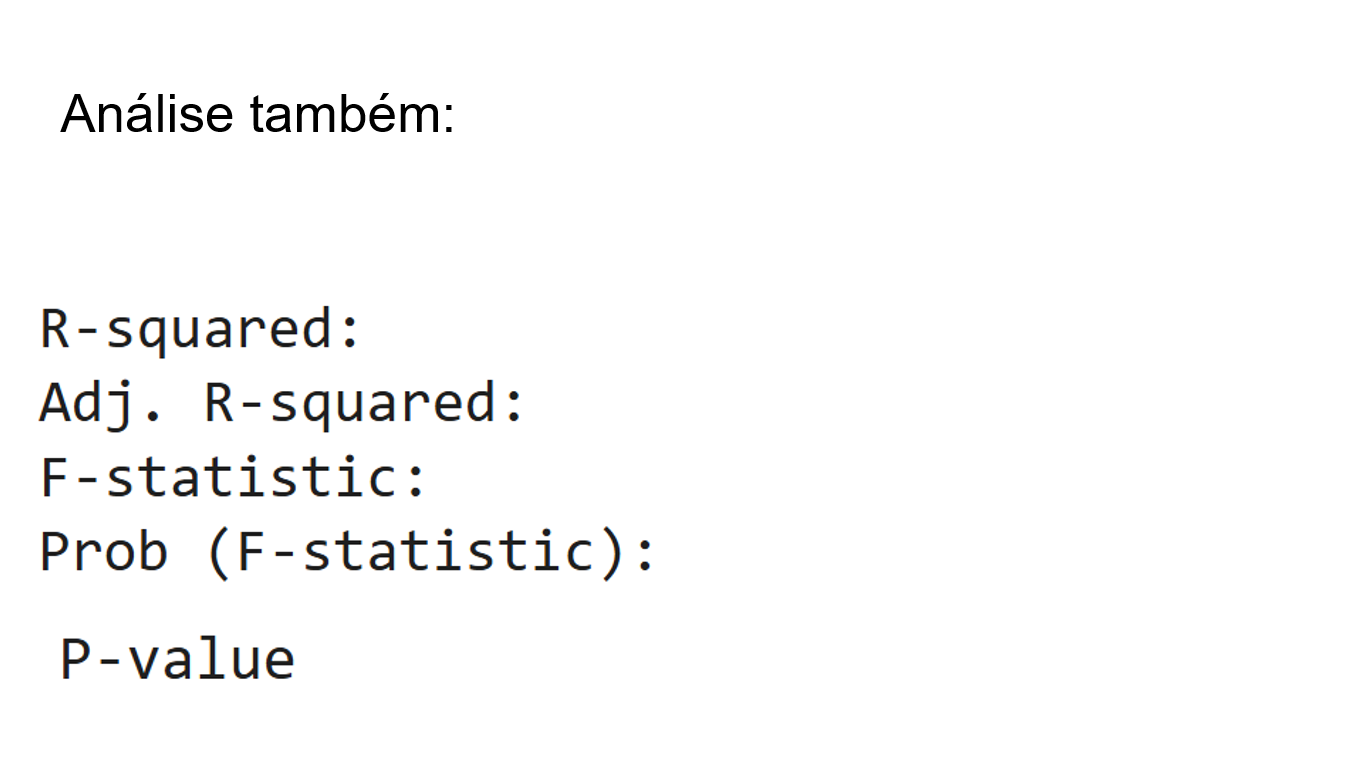
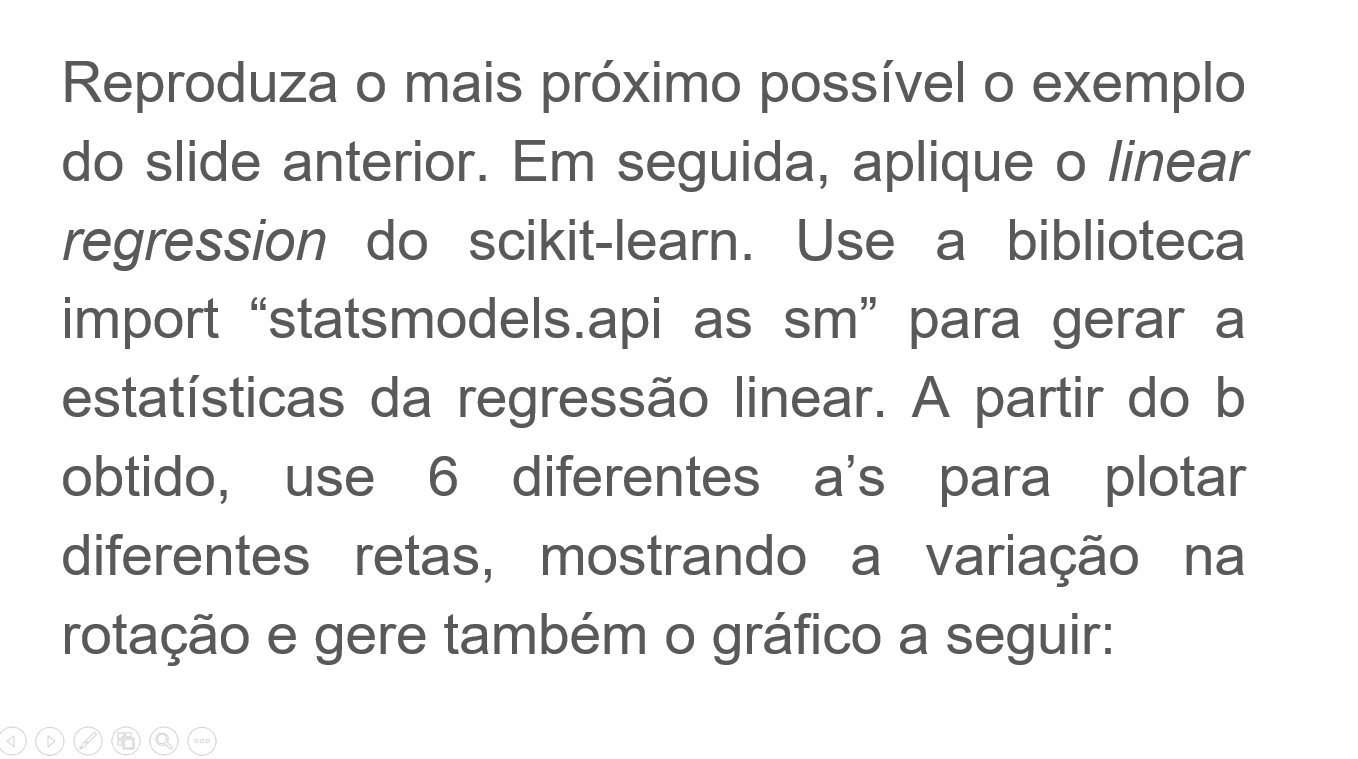
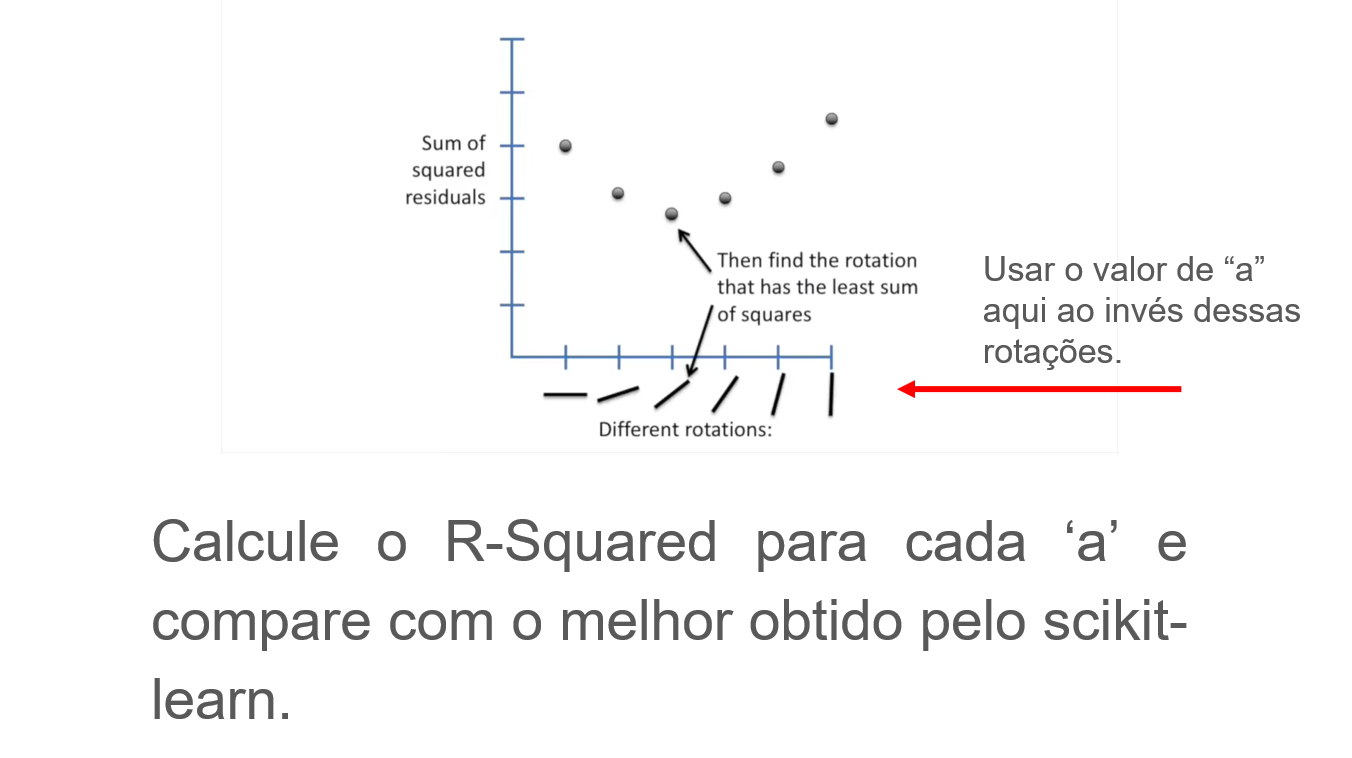